**Выпускная квалификационная работа**


на тему: **Прогнозирование конечных свойств новых материалов (композиционных материалов)**

на входе: данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.)

на выходе: спрогнозированный ряд конечных свойств получаемых композиционных материалов

In [1]:
#импорт библиотек

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from pandas import read_excel, DataFrame, Series
from numpy.random import seed
from scipy import stats
from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from random import seed
import warnings
warnings.filterwarnings("ignore")


In [2]:
#загрузка исходных данных первого датасета
df_1=pd.read_excel('/kaggle/input/datasetvkr/X_bp.xlsx')
df_1.shape 

(1023, 11)

In [3]:
#Сохраним настройки и Randome seed 
!pip freeze> requirements.txt
RANDOM_SEED = 45

In [4]:
#вывод первых 5 строк первого датасета , по умолчанию
df_1.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [5]:
#зададим количество цифр, выводимых после запятой
pd.set_option('display.precision',2)
df_1

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.86,2030.00,738.74,30.00,22.27,100.00,210.00,70.00,3000.00,220.00
1,1.0,1.86,2030.00,738.74,50.00,23.75,284.62,210.00,70.00,3000.00,220.00
2,2.0,1.86,2030.00,738.74,49.90,33.00,284.62,210.00,70.00,3000.00,220.00
3,3.0,1.86,2030.00,738.74,129.00,21.25,300.00,210.00,70.00,3000.00,220.00
4,4.0,2.77,2030.00,753.00,111.86,22.27,284.62,210.00,70.00,3000.00,220.00
...,...,...,...,...,...,...,...,...,...,...,...
1018,1018.0,2.27,1952.09,912.86,86.99,20.12,324.77,209.20,73.09,2387.29,125.01
1019,1019.0,3.44,2050.09,444.73,145.98,19.60,254.22,350.66,72.92,2360.39,117.73
1020,1020.0,3.28,1972.37,416.84,110.53,23.96,248.42,740.14,74.73,2662.91,236.61
1021,1021.0,3.71,2066.80,741.48,141.40,19.25,275.78,641.47,74.04,2071.72,197.13


In [6]:
#общая информация по DataFrame (описательная статистика)
df_1.describe()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.00,1023.00,1023.00,1023.00,1023.00,1023.00,1023.00,1023.00,1023.00,1023.00,1023.00
mean,511.00,2.93,1975.73,739.92,110.57,22.24,285.88,482.73,73.33,2466.92,218.42
std,295.46,0.91,73.73,330.23,28.30,2.41,40.94,281.31,3.12,485.63,59.74
min,0.00,0.39,1731.76,2.44,17.74,14.25,100.00,0.60,64.05,1036.86,33.80
25%,255.50,2.32,1924.16,500.05,92.44,20.61,259.07,266.82,71.25,2135.85,179.63
50%,511.00,2.91,1977.62,739.66,110.56,22.23,285.90,451.86,73.27,2459.52,219.20
75%,766.50,3.55,2021.37,961.81,129.73,23.96,313.00,693.23,75.36,2767.19,257.48
max,1022.00,5.59,2207.77,1911.54,198.95,33.00,413.27,1399.54,82.68,3848.44,414.59


Просмотр числовых статистик методом describe()
* count- количество элементов
* mean- среднее арифмитическое
* std- стандартное отклонение
* min,max - мин и макс значение соответственно 25%, 50%, 75%, -25,
50 75 процентные перцентили


In [7]:
# получение информации о столбцах
df_1.columns

Index(['Unnamed: 0', 'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

In [8]:
#удаление первой колонки с индексом
df_1_new=df_1.drop(['Unnamed: 0'], axis=1,inplace=True)
df_1_new
df_1

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.86,2030.00,738.74,30.00,22.27,100.00,210.00,70.00,3000.00,220.00
1,1.86,2030.00,738.74,50.00,23.75,284.62,210.00,70.00,3000.00,220.00
2,1.86,2030.00,738.74,49.90,33.00,284.62,210.00,70.00,3000.00,220.00
3,1.86,2030.00,738.74,129.00,21.25,300.00,210.00,70.00,3000.00,220.00
4,2.77,2030.00,753.00,111.86,22.27,284.62,210.00,70.00,3000.00,220.00
...,...,...,...,...,...,...,...,...,...,...
1018,2.27,1952.09,912.86,86.99,20.12,324.77,209.20,73.09,2387.29,125.01
1019,3.44,2050.09,444.73,145.98,19.60,254.22,350.66,72.92,2360.39,117.73
1020,3.28,1972.37,416.84,110.53,23.96,248.42,740.14,74.73,2662.91,236.61
1021,3.71,2066.80,741.48,141.40,19.25,275.78,641.47,74.04,2071.72,197.13


In [9]:
#размер DataFrame 
df_1.shape

(1023, 10)

In [10]:
#загрузка исходных данных второго датасета
df_2=pd.read_excel('/kaggle/input/datasetvkr/X_nup.xlsx')
df_2.shape

(1040, 4)

In [11]:
#удаление первой колонки с индексом
df_2_new=df_2.drop(['Unnamed: 0'], axis=1, inplace=True)
df_2_new
df_2

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,4.00,57.00
1,0.0,4.00,60.00
2,0.0,4.00,70.00
3,0.0,5.00,47.00
4,0.0,5.00,57.00
...,...,...,...
1035,90.0,8.09,47.76
1036,90.0,7.62,66.93
1037,90.0,9.80,72.86
1038,90.0,10.08,65.52


In [12]:
# объединение исходных файлов в единый набор данных 
# согласно условию задачи по типу INNER
df=df_1.merge(df_2,left_index=True, right_index=True, how='inner')
df.head().T 

,0,1,2,3,4
Соотношение матрица-наполнитель,1.86,1.86,1.86,1.86,2.77
"Плотность, кг/м3",2030.00,2030.00,2030.00,2030.00,2030.00
"модуль упругости, ГПа",738.74,738.74,738.74,738.74,753.00
"Количество отвердителя, м.%",30.00,50.00,49.90,129.00,111.86
"Содержание эпоксидных групп,%_2",22.27,23.75,33.00,21.25,22.27
"Температура вспышки, С_2",100.00,284.62,284.62,300.00,284.62
"Поверхностная плотность, г/м2",210.00,210.00,210.00,210.00,210.00
"Модуль упругости при растяжении, ГПа",70.00,70.00,70.00,70.00,70.00
"Прочность при растяжении, МПа",3000.00,3000.00,3000.00,3000.00,3000.00
"Потребление смолы, г/м2",220.00,220.00,220.00,220.00,220.00


In [13]:
#размер получившегося DataFrame
df.shape

(1023, 13)

В итоговом датасете видим, что 17 строк второго датасета не рассматриваем

**Разведочный анализ полученного датасета**

In [14]:
#информация о столбцах
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

In [15]:
#поиск уникальных значений
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Значение  столбца "Угол нашивки" имеет только два уникальных значения. 
Из таблицы выше видим, что одно из значений равен 0. 
* Категориальные данные представляют собой данные с ограниченным числом уникальных значений или категорий.


In [16]:
#преобразуем столбец "Угол нашивки"
# приведем к значениям 0 и 1 и integer
df=df.replace({'Угол нашивки, град':{0.0:0,90.0 : 1}})
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(int)
#переименуем столбец
df=df.rename(columns={'Угол нашивки, град': 'Угол нашивки'})
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.86,2030.00,738.74,30.00,22.27,100.00,210.00,70.00,3000.00,220.00,0,4.00,57.00
1,1.86,2030.00,738.74,50.00,23.75,284.62,210.00,70.00,3000.00,220.00,0,4.00,60.00
2,1.86,2030.00,738.74,49.90,33.00,284.62,210.00,70.00,3000.00,220.00,0,4.00,70.00
3,1.86,2030.00,738.74,129.00,21.25,300.00,210.00,70.00,3000.00,220.00,0,5.00,47.00
4,2.77,2030.00,753.00,111.86,22.27,284.62,210.00,70.00,3000.00,220.00,0,5.00,57.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.27,1952.09,912.86,86.99,20.12,324.77,209.20,73.09,2387.29,125.01,1,9.08,47.02
1019,3.44,2050.09,444.73,145.98,19.60,254.22,350.66,72.92,2360.39,117.73,1,10.57,53.75
1020,3.28,1972.37,416.84,110.53,23.96,248.42,740.14,74.73,2662.91,236.61,1,4.16,67.63
1021,3.71,2066.80,741.48,141.40,19.25,275.78,641.47,74.04,2071.72,197.13,1,6.31,58.26


In [17]:
#перевод столбца с порядковыми номерами в integer
df.index=df.index.astype('int')

In [18]:
df.index.name='номер по порядку'
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
номер по порядку,,,,,,,,,,,,,
0,1.86,2030.00,738.74,30.00,22.27,100.00,210.00,70.00,3000.00,220.00,0,4.00,57.00
1,1.86,2030.00,738.74,50.00,23.75,284.62,210.00,70.00,3000.00,220.00,0,4.00,60.00
2,1.86,2030.00,738.74,49.90,33.00,284.62,210.00,70.00,3000.00,220.00,0,4.00,70.00
3,1.86,2030.00,738.74,129.00,21.25,300.00,210.00,70.00,3000.00,220.00,0,5.00,47.00
4,2.77,2030.00,753.00,111.86,22.27,284.62,210.00,70.00,3000.00,220.00,0,5.00,57.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.27,1952.09,912.86,86.99,20.12,324.77,209.20,73.09,2387.29,125.01,1,9.08,47.02
1019,3.44,2050.09,444.73,145.98,19.60,254.22,350.66,72.92,2360.39,117.73,1,10.57,53.75
1020,3.28,1972.37,416.84,110.53,23.96,248.42,740.14,74.73,2662.91,236.61,1,4.16,67.63


In [19]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [20]:
bin_cols=['Угол нашивки']

In [21]:
num_cols= ["Соотношение матрица-наполнитель", "Плотность, кг/м3",
         "модуль упругости, ГПа", "Количество отвердителя, м.%" ,
         "Поверхностная плотность, г/м2", "Модуль упругости при растяжении, ГПа",
         "Прочность при растяжении, МПа", "Потребление смолы, г/м2",
         "Шаг нашивки", "Плотность нашивки"]


In [22]:
#проверим на наличие пропущенных данных
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

поскольку пропущенных данных нет, то очистка не требуется

In [23]:
#проверка на наличие дубликатов
df.duplicated().sum()

0

Дубликатов также нет

In [24]:
#находим среднее, медианное значение для каждой колонки
#согласно условиям задачи
mean_and_50=df.describe()
mean_and_50.loc[['mean','50%']]

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
mean,2.93,1975.73,739.92,110.57,22.24,285.88,482.73,73.33,2466.92,218.42,0.49,6.90,57.15
50%,2.91,1977.62,739.66,110.56,22.23,285.90,451.86,73.27,2459.52,219.20,0.00,6.92,57.34


In [25]:
df.mean()

Соотношение матрица-наполнитель            2.93
Плотность, кг/м3                        1975.73
модуль упругости, ГПа                    739.92
Количество отвердителя, м.%              110.57
Содержание эпоксидных групп,%_2           22.24
Температура вспышки, С_2                 285.88
Поверхностная плотность, г/м2            482.73
Модуль упругости при растяжении, ГПа      73.33
Прочность при растяжении, МПа           2466.92
Потребление смолы, г/м2                  218.42
Угол нашивки                               0.49
Шаг нашивки                                6.90
Плотность нашивки                         57.15
dtype: float64

In [26]:
df.median()

Соотношение матрица-наполнитель            2.91
Плотность, кг/м3                        1977.62
модуль упругости, ГПа                    739.66
Количество отвердителя, м.%              110.56
Содержание эпоксидных групп,%_2           22.23
Температура вспышки, С_2                 285.90
Поверхностная плотность, г/м2            451.86
Модуль упругости при растяжении, ГПа      73.27
Прочность при растяжении, МПа           2459.52
Потребление смолы, г/м2                  219.20
Угол нашивки                               0.00
Шаг нашивки                                6.92
Плотность нашивки                         57.34
dtype: float64

In [27]:
#коэффициент корреляции Пирсона
df.corr(method='pearson')

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.00e+00,3.84e-03,3.17e-02,-6.44e-03,1.98e-02,-4.78e-03,-6.27e-03,-8.41e-03,2.41e-02,7.25e-02,-3.11e-02,3.64e-02,-4.65e-03
"Плотность, кг/м3",3.84e-03,1.00e+00,-9.65e-03,-3.59e-02,-8.28e-03,-2.07e-02,4.49e-02,-1.76e-02,-7.00e-02,-1.59e-02,-6.85e-02,-6.10e-02,8.03e-02
"модуль упругости, ГПа",3.17e-02,-9.65e-03,1.00e+00,2.40e-02,-6.80e-03,3.12e-02,-5.31e-03,2.33e-02,4.19e-02,1.84e-03,-2.54e-02,-9.87e-03,5.63e-02
"Количество отвердителя, м.%",-6.44e-03,-3.59e-02,2.40e-02,1.00e+00,-6.84e-04,9.52e-02,5.52e-02,-6.59e-02,-7.54e-02,7.45e-03,3.86e-02,1.49e-02,1.72e-02
"Содержание эпоксидных групп,%_2",1.98e-02,-8.28e-03,-6.80e-03,-6.84e-04,1.00e+00,-9.77e-03,-1.29e-02,5.68e-02,-2.39e-02,1.52e-02,8.05e-03,3.02e-03,-3.91e-02
"Температура вспышки, С_2",-4.78e-03,-2.07e-02,3.12e-02,9.52e-02,-9.77e-03,1.00e+00,2.01e-02,2.84e-02,-3.18e-02,6.00e-02,2.07e-02,2.58e-02,1.14e-02
"Поверхностная плотность, г/м2",-6.27e-03,4.49e-02,-5.31e-03,5.52e-02,-1.29e-02,2.01e-02,1.00e+00,3.67e-02,-3.21e-03,1.57e-02,5.23e-02,3.83e-02,-4.99e-02
"Модуль упругости при растяжении, ГПа",-8.41e-03,-1.76e-02,2.33e-02,-6.59e-02,5.68e-02,2.84e-02,3.67e-02,1.00e+00,-9.01e-03,5.09e-02,2.30e-02,-2.95e-02,6.48e-03
"Прочность при растяжении, МПа",2.41e-02,-7.00e-02,4.19e-02,-7.54e-02,-2.39e-02,-3.18e-02,-3.21e-03,-9.01e-03,1.00e+00,2.86e-02,2.34e-02,-5.95e-02,1.96e-02
"Потребление смолы, г/м2",7.25e-02,-1.59e-02,1.84e-03,7.45e-03,1.52e-02,6.00e-02,1.57e-02,5.09e-02,2.86e-02,1.00e+00,-1.53e-02,1.34e-02,1.22e-02


статистическая зависимость не наблюдается

**Визуализация данных**

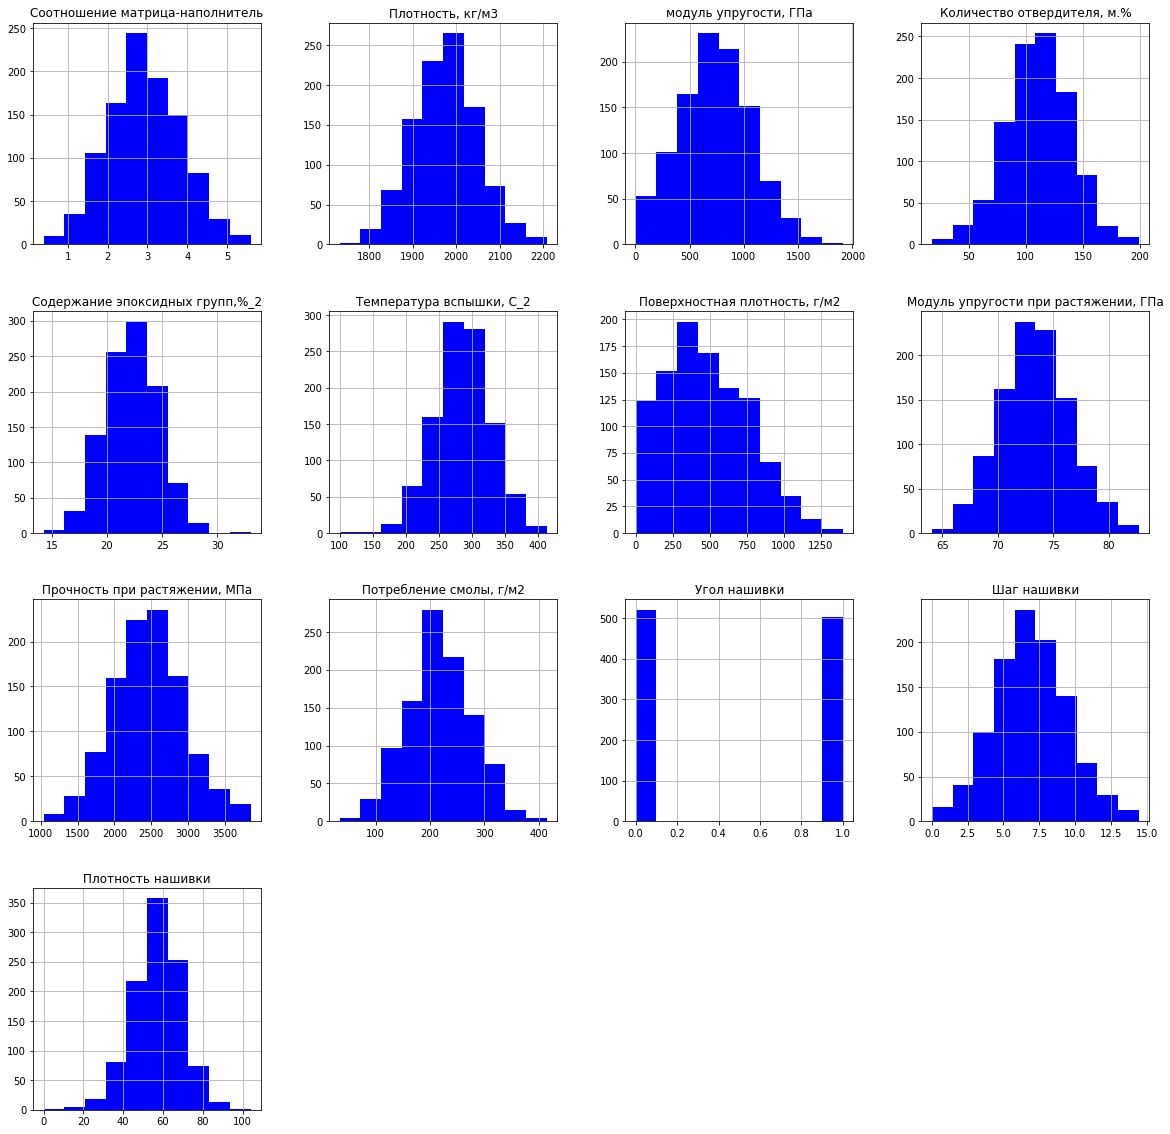

In [28]:
#гистограмма распределения
df.hist(figsize=(20,20), color="b")
plt.show()

Параметры в большинстве своем близкие к нормальному распределению, за исключением "Угол нашивки", т.к. имеет только два значения.

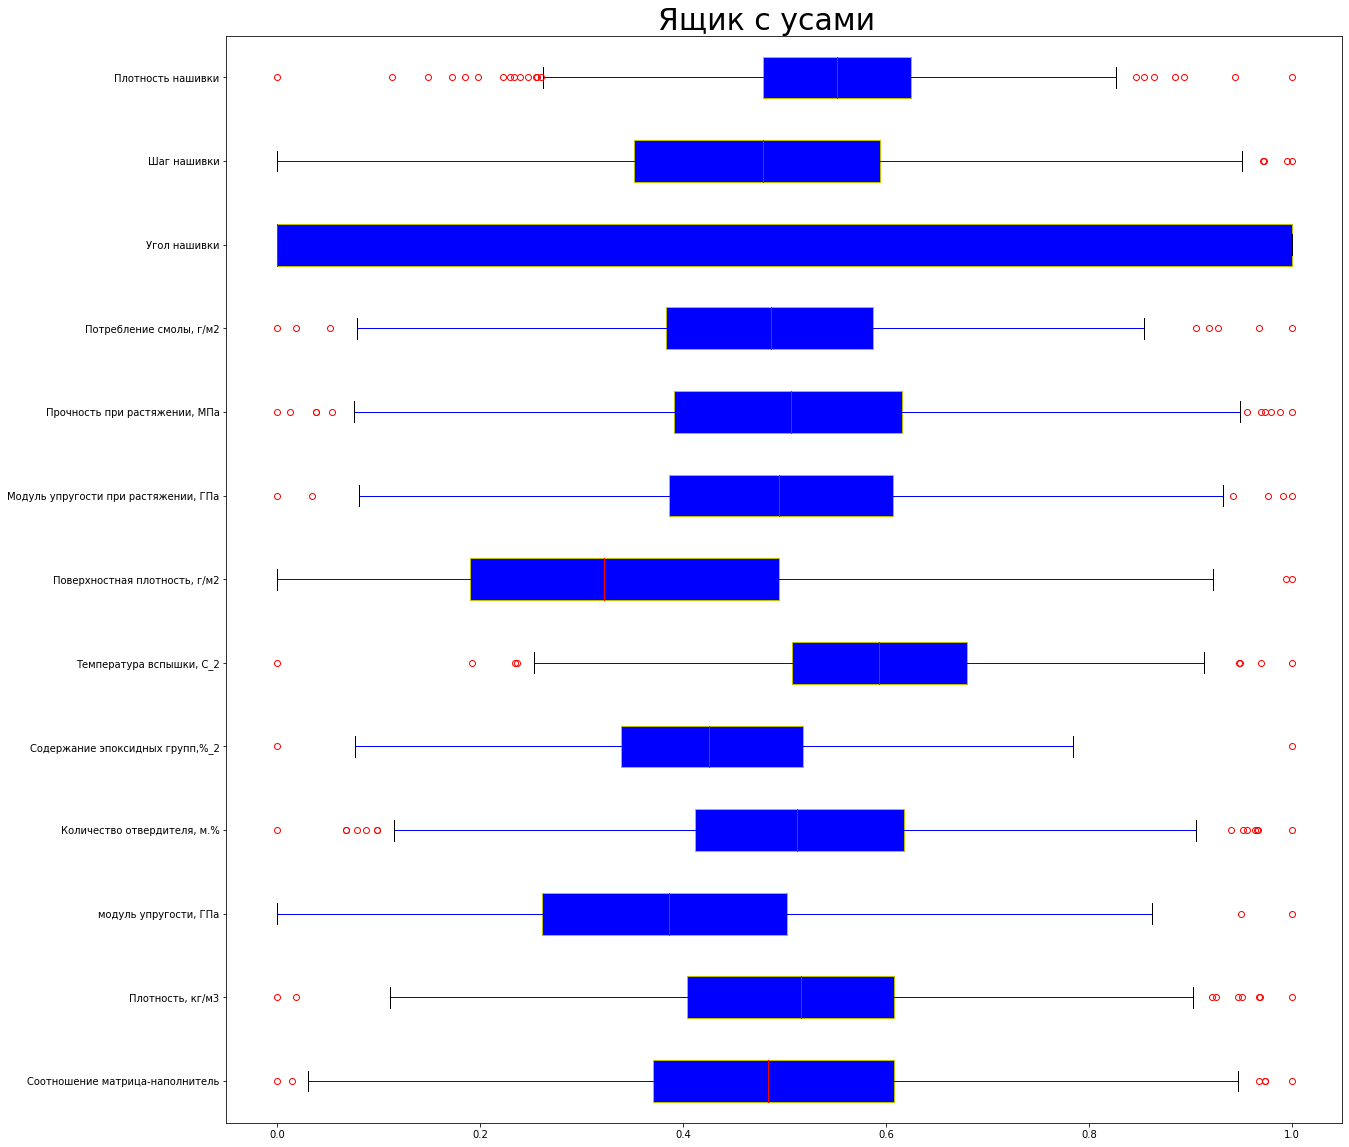

In [29]:
#построение бокспотов ("ящики с усами")
scaler=MinMaxScaler()
scaler.fit(df)
plt.figure(figsize=(20,20))
plt.suptitle('Ящик с усами', y=0.9, fontsize=30)
plt.boxplot(pd.DataFrame(scaler.transform(df)), labels=df.columns,
           patch_artist=True, meanline=True, vert=False, boxprops=dict(facecolor='b', color='y'),
            medianprops=dict(color='r'), whiskerprops=dict(color='b'),
            capprops=dict(color='black'),flierprops=dict(color='g', markeredgecolor='r')), 
            
plt.show()

Наблюдаются выбросы в каждом столбце, кроме "Угол нашивки"

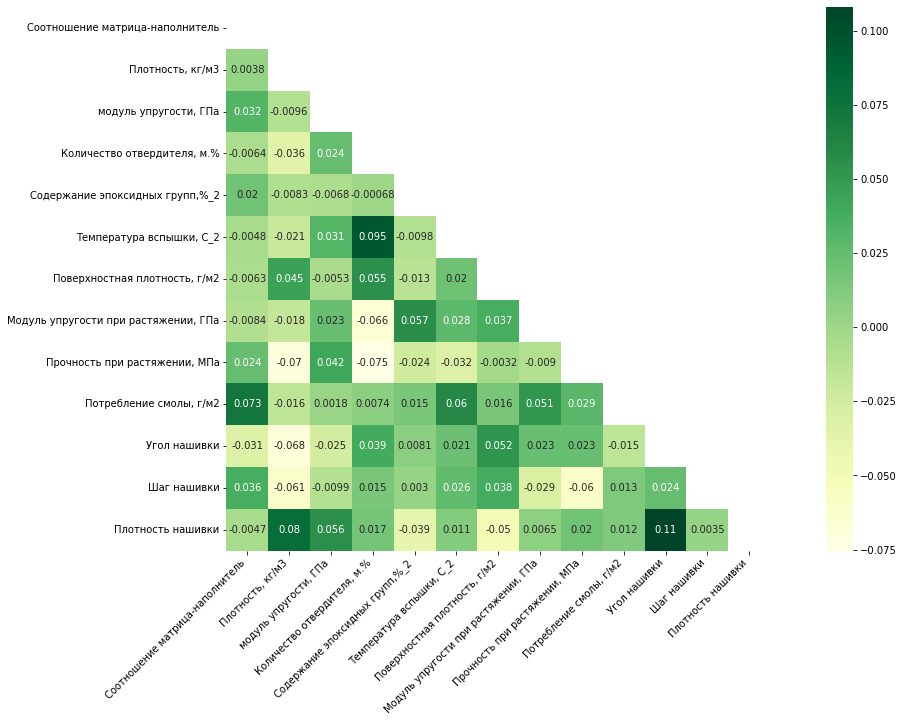

In [30]:
#визуализация корреляционной матрицы с помощью тепловой карты
mask=np.triu(df.corr())
#полотно для отображения графика
f, ax=plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), mask = mask,annot= True,square= True,cmap = 'YlGn')
plt.xticks(rotation= 45, ha ='right')
plt.show()

Корреляция входных переменных очень слабая

**Предобработка данных**

In [31]:
#пропуски отсутствуют, удаляем выбросы методом сигм и межквартильных расстояний


Некоторые выбросы должны быть исключены из набора данных, так как их причинами являются ошибки и технические неполадки, другие выбросы необходимо оставить в наборе данных Например, выброс не является результатом ошибки и дает новое понимаение тестируемого явления. научные эксперементы особенно чувствительны к выбросам- исключив  выброс по ошибке, можно пропустить новую тенденцию или открытие.

поиск выбросов с помощью кластеризацмм, где выбросы- это элементы малых групп, с помощью моделей предсказания (метод опорных векторов и вариации решающих деревьев)

**Неинформативные признаки**
Если признак несет слишком много строк с одинаоквыми значениями, он не несет полезной информации

Составим список признаков, у которых более 95% строк содержат одно и то же значение


<AxesSubplot:ylabel='номер по порядку'>

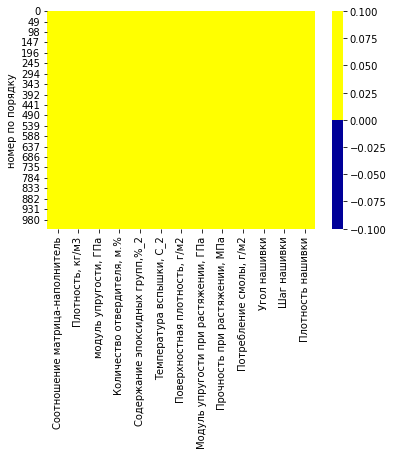

In [32]:
#тепловая карта пропущенных значений
cols=df.columns[:30]
colours=['#000099','#ffff00']
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colours))

In [33]:
#список признаков с высоким процентом одинаковых значений
num=len(df.index.name)
low_information_cols=[] #

for col in df.columns:
    cnts=df[col].value_counts(dropna=False)
    top_pct=(cnts/num).iloc[0]
    
    if top_pct>0.85:
        low_information_cols.append(col)
        print('{0}:{1:.5f}%'.format(col,top_pct*100))
        print(cnts)
        print()
    

Потребление смолы, г/м2:87.50000%
220.00    14
300.00     5
120.00     4
197.13     1
226.99     1
          ..
250.82     1
242.42     1
213.68     1
212.31     1
194.75     1
Name: Потребление смолы, г/м2, Length: 1003, dtype: int64

Угол нашивки:3250.00000%
0    520
1    503
Name: Угол нашивки, dtype: int64



In [34]:
# значения выбивающиеся из распределения
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

<Figure size 432x288 with 0 Axes>

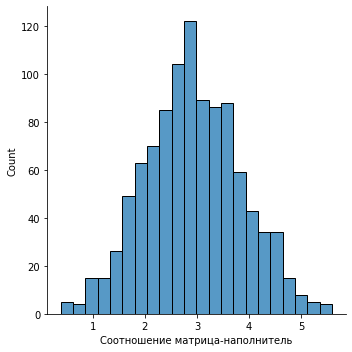

<Figure size 432x288 with 0 Axes>

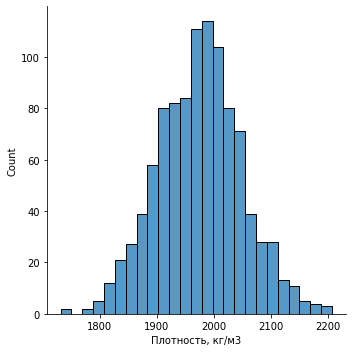

<Figure size 432x288 with 0 Axes>

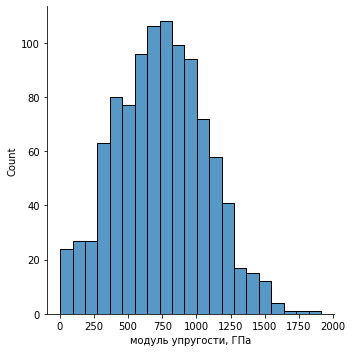

<Figure size 432x288 with 0 Axes>

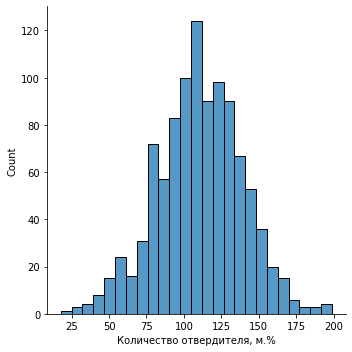

<Figure size 432x288 with 0 Axes>

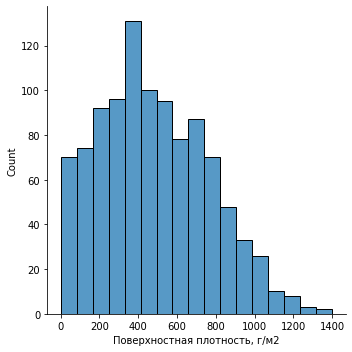

<Figure size 432x288 with 0 Axes>

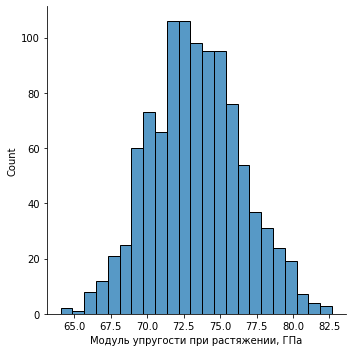

<Figure size 432x288 with 0 Axes>

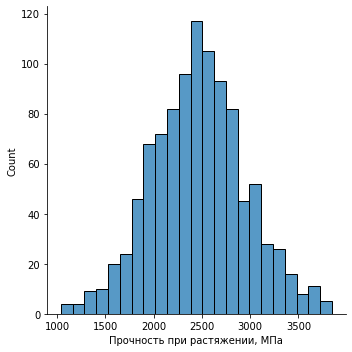

<Figure size 432x288 with 0 Axes>

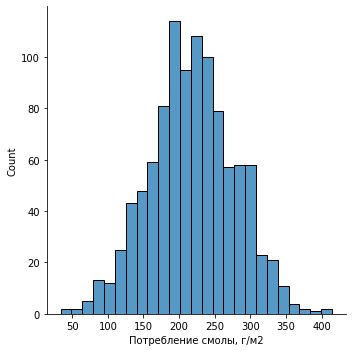

<Figure size 432x288 with 0 Axes>

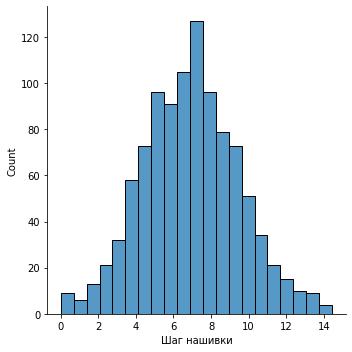

<Figure size 432x288 with 0 Axes>

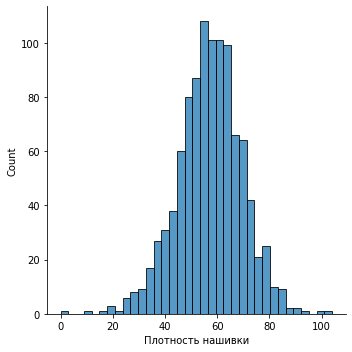

In [35]:
for col in num_cols:
    plt.figure()
    sns.displot(df[col], kde=False, rug=False)

In [36]:
#проверка на выбросы при помощи IQR

In [37]:
for col in num_cols:
    IQR=df[col].quantile(0.75)- df[col].quantile(0.25)
    perc25=df[col].quantile(0.25)   #25й перцентиль
    perc75=df[col].quantile(0.75)   #75й перцентиль
    
    print(
      f'Название столбца:{col} '
     '25-й перцентиль:{},'.format(perc25),
     '75-й перцентиль: {},'.format(perc75),
     'IQR: {},'.format(IQR))
     #'Границы выбросов:[{f},{l}].'.format(f = perc25 - 1.5*IQR,l = perc75 + 1.5*IQR)
     # эта строчка границы не считает ошибка" .'."

Название столбца:Соотношение матрица-наполнитель 25-й перцентиль:2.3178866441274053, 75-й перцентиль: 3.5526598969172998, IQR: 1.2347732527898945,
Название столбца:Плотность, кг/м3 25-й перцентиль:1924.15546684573, 75-й перцентиль: 2021.37437454241, IQR: 97.21890769667993,
Название столбца:модуль упругости, ГПа 25-й перцентиль:500.047451765589, 75-й перцентиль: 961.8125264888465, IQR: 461.7650747232575,
Название столбца:Количество отвердителя, м.% 25-й перцентиль:92.44349744977785, 75-й перцентиль: 129.730365711903, IQR: 37.286868262125154,
Название столбца:Поверхностная плотность, г/м2 25-й перцентиль:266.8166453315415, 75-й перцентиль: 693.225017143528, IQR: 426.4083718119865,
Название столбца:Модуль упругости при растяжении, ГПа 25-й перцентиль:71.2450183671113, 75-й перцентиль: 75.35661203894679, IQR: 4.111593671835493,
Название столбца:Прочность при растяжении, МПа 25-й перцентиль:2135.8504482090248, 75-й перцентиль: 2767.19311916023, IQR: 631.342670951205,
Название столбца:Потреб

<AxesSubplot:>

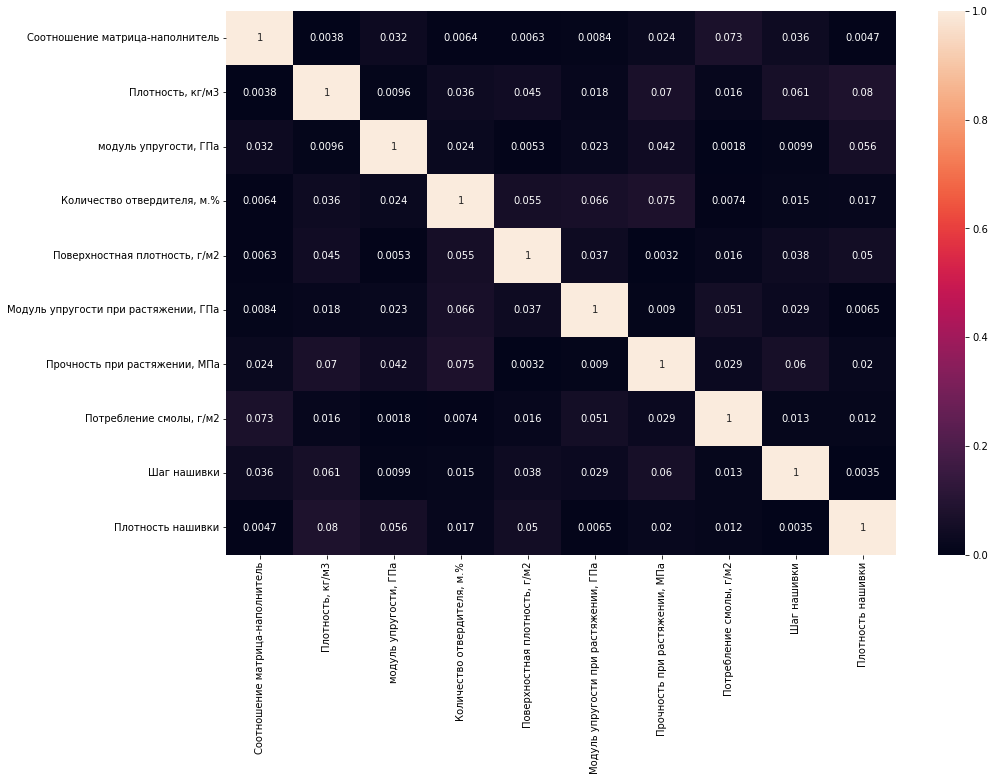

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(df[num_cols].corr().abs(),vmin=0, vmax=1, annot=True)

In [39]:
# сравним метод 3х сигм и межквартильных расстояний для удаления выбросов
metod_3s=0
metod_iq=0
count_3s=[] #список
count_iq=[] #список для записи количества выбросов по каждому столбцу
for column in df:
    d = df.loc[:,[column]]
    #метод 3х сигм
    zscore=(df[column]-df[column].mean())/df[column].std()
    d['3s']=zscore.abs()>3
    metod_3s+=d['3s'].sum()
    count_3s.append(d['3s'].sum())
    print(column,'3s', ': ', d['3s'].sum())
    
    #метод межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr=q3-q1
    lower = q1-1.5* iqr
    upper = q3+1.5*iqr
    d['iq']=(df[column]<=lower)|(df[column]>=upper)
    metod_iq+=d['iq'].sum()
    count_iq.append(d['iq'].sum())
    print(column, ': ', d['iq'].sum())
print('Метод 3х сигм, выбросов:', metod_3s)
print('Метод межквартильных расстояни, выбросов:', metod_iq)
    

Соотношение матрица-наполнитель 3s :  0
Соотношение матрица-наполнитель :  6
Плотность, кг/м3 3s :  3
Плотность, кг/м3 :  9
модуль упругости, ГПа 3s :  2
модуль упругости, ГПа :  2
Количество отвердителя, м.% 3s :  2
Количество отвердителя, м.% :  14
Содержание эпоксидных групп,%_2 3s :  2
Содержание эпоксидных групп,%_2 :  2
Температура вспышки, С_2 3s :  3
Температура вспышки, С_2 :  8
Поверхностная плотность, г/м2 3s :  2
Поверхностная плотность, г/м2 :  2
Модуль упругости при растяжении, ГПа 3s :  0
Модуль упругости при растяжении, ГПа :  6
Прочность при растяжении, МПа 3s :  0
Прочность при растяжении, МПа :  11
Потребление смолы, г/м2 3s :  3
Потребление смолы, г/м2 :  8
Угол нашивки 3s :  0
Угол нашивки :  0
Шаг нашивки 3s :  0
Шаг нашивки :  4
Плотность нашивки 3s :  7
Плотность нашивки :  21
Метод 3х сигм, выбросов: 24
Метод межквартильных расстояни, выбросов: 93


In [40]:
num_cols

['Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Потребление смолы, г/м2',
 'Шаг нашивки',
 'Плотность нашивки']

In [41]:
#исключение выбросов методом межквартильного расстояния
for i in num_cols:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75+ (1.5*intr_qr)
    min = q25 - (1.5*intr_qr)
    df.loc[df[i]< min, i] = np.nan
    df.loc[df[i]>max, i] = np.nan

In [42]:
#выбросы по каждому столбцу
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          0
Температура вспышки, С_2                 0
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки                             0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [43]:
#удаление строки с выбросами
df = df.dropna(axis=0)

In [44]:
#сумма выбросов
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       944 non-null    float64
 1   Плотность, кг/м3                      944 non-null    float64
 2   модуль упругости, ГПа                 944 non-null    float64
 3   Количество отвердителя, м.%           944 non-null    float64
 4   Содержание эпоксидных групп,%_2       944 non-null    float64
 5   Температура вспышки, С_2              944 non-null    float64
 6   Поверхностная плотность, г/м2         944 non-null    float64
 7   Модуль упругости при растяжении, ГПа  944 non-null    float64
 8   Прочность при растяжении, МПа         944 non-null    float64
 9   Потребление смолы, г/м2               944 non-null    float64
 10  Угол нашивки                          944 non-null    int64  
 11  Шаг нашивки       

После удаления выбросов осталось 944 строки

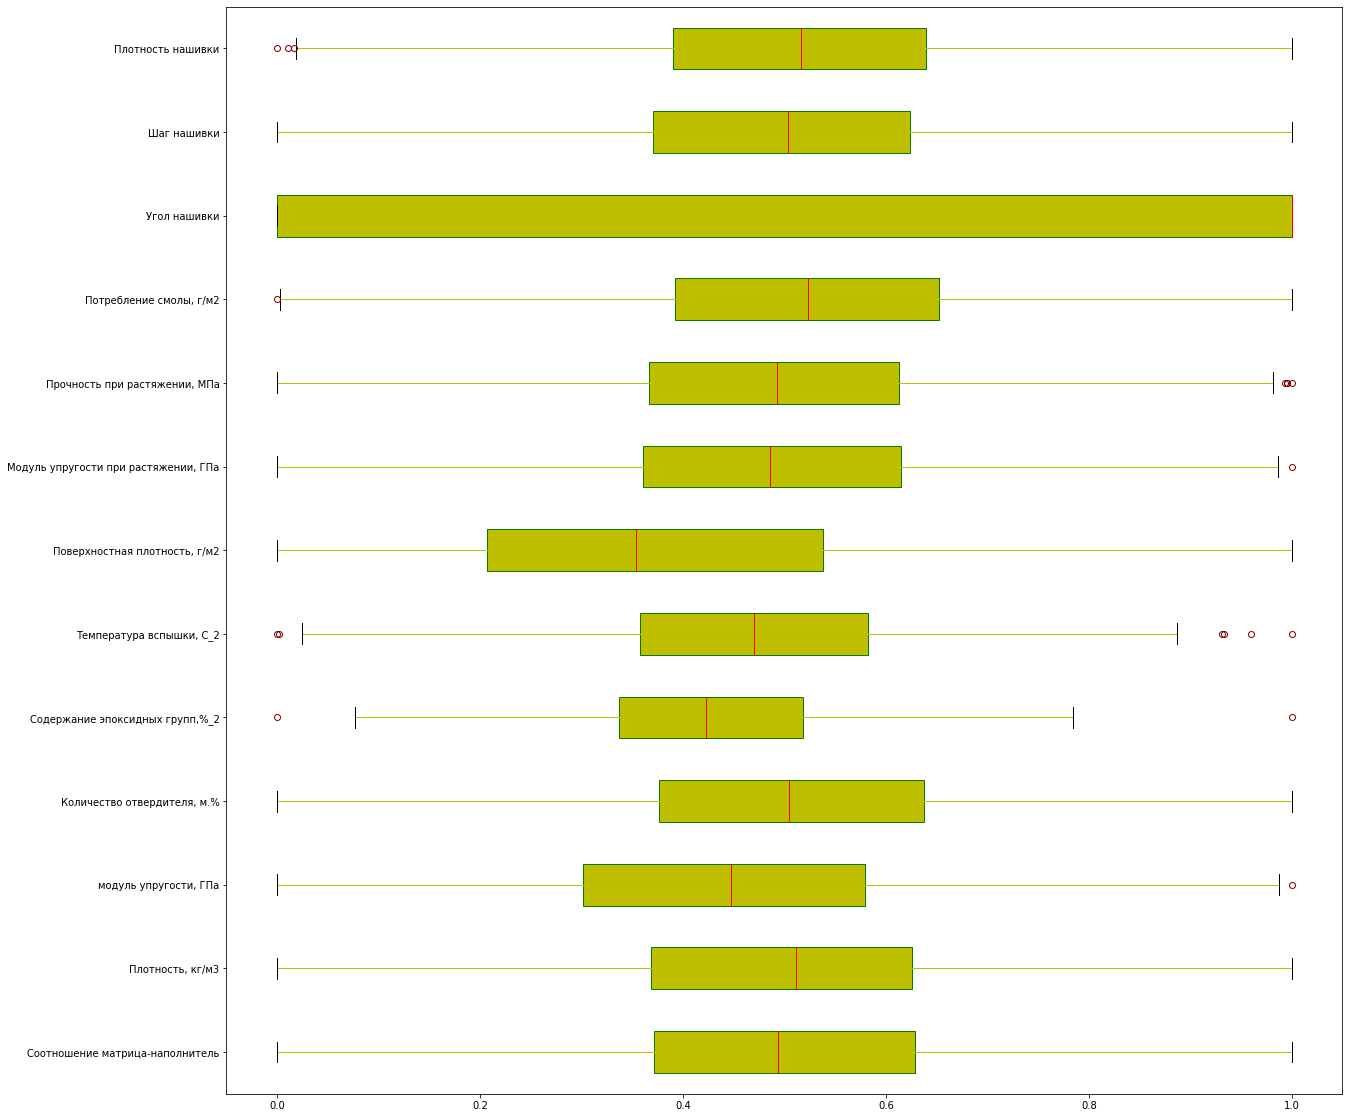

In [46]:
#построение ящик с усами"
scaler= MinMaxScaler()
scaler.fit(df)
plt.figure(figsize = (20, 20))
plt.boxplot(pd.DataFrame(scaler.transform(df)), labels = df.columns, patch_artist = True, meanline = True, vert = False, boxprops = dict(facecolor= 'y', color = 'g'), medianprops = dict (color ='red'), whiskerprops = dict( color = "y"), capprops = dict (color= "black"), flierprops=dict(color='g', markeredgecolor="maroon"))
plt.show()

выбросы еще остались

In [47]:
metod_iq=0
count_iq=[]
for column in df:
    d=df.loc[:, [column]]
    q1=np.quantile(df[column], 0.25)
    q3=np.quantile(df[column], 0.75)
    iqr = q3-q1
    lower =q1-1.5*iqr
    upper =q3+1.5*iqr
    d['iq']=(df[column]<=lower)|(df[column]>=upper)
    metod_iq+=d['iq'].sum()
    count_iq.append(d['iq'].sum())
    print(column, ': ', d['iq'].sum())
print('метод межквартильных расстояний, выбросов:',metod_iq)

Соотношение матрица-наполнитель :  0
Плотность, кг/м3 :  0
модуль упругости, ГПа :  1
Количество отвердителя, м.% :  0
Содержание эпоксидных групп,%_2 :  2
Температура вспышки, С_2 :  6
Поверхностная плотность, г/м2 :  0
Модуль упругости при растяжении, ГПа :  1
Прочность при растяжении, МПа :  4
Потребление смолы, г/м2 :  1
Угол нашивки :  0
Шаг нашивки :  0
Плотность нашивки :  3
метод межквартильных расстояний, выбросов: 18


In [48]:
#удаление
for i in num_cols:
    q75, q25 = np.percentile(df.loc[:, i], [75,25])
    intr_qr=q75-q25
    max=q75+(1.5*intr_qr)
    min=q25-(1.5*intr_qr)
    df.loc[df[i]<min,i]=np.nan
    df.loc[df[i]>max, i]=np.nan

In [49]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   1
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    1
Прочность при растяжении, МПа           4
Потребление смолы, г/м2                 1
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       3
dtype: int64

In [50]:
df=df.dropna(axis=0)

In [51]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       934 non-null    float64
 1   Плотность, кг/м3                      934 non-null    float64
 2   модуль упругости, ГПа                 934 non-null    float64
 3   Количество отвердителя, м.%           934 non-null    float64
 4   Содержание эпоксидных групп,%_2       934 non-null    float64
 5   Температура вспышки, С_2              934 non-null    float64
 6   Поверхностная плотность, г/м2         934 non-null    float64
 7   Модуль упругости при растяжении, ГПа  934 non-null    float64
 8   Прочность при растяжении, МПа         934 non-null    float64
 9   Потребление смолы, г/м2               934 non-null    float64
 10  Угол нашивки                          934 non-null    int64  
 11  Шаг нашивки       

934 строки

In [53]:
#можно зациклить алгоритм, но пока не хватает навыка или времени, поэтому повторяем
for i in num_cols:
    q75,q25=np.percentile(df.loc[:,i],[75,25])
    intr_qr=q75-q25
    max=q75+(1.5*intr_qr)
    min=q25-(1.5*intr_qr)
    df.loc[df[i]<min,i]=np.nan
    df.loc[df[i]>max,i]=np.nan

In [54]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           3
Потребление смолы, г/м2                 1
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       1
dtype: int64

In [55]:
df=df.dropna(axis=0)

In [56]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       929 non-null    float64
 1   Плотность, кг/м3                      929 non-null    float64
 2   модуль упругости, ГПа                 929 non-null    float64
 3   Количество отвердителя, м.%           929 non-null    float64
 4   Содержание эпоксидных групп,%_2       929 non-null    float64
 5   Температура вспышки, С_2              929 non-null    float64
 6   Поверхностная плотность, г/м2         929 non-null    float64
 7   Модуль упругости при растяжении, ГПа  929 non-null    float64
 8   Прочность при растяжении, МПа         929 non-null    float64
 9   Потребление смолы, г/м2               929 non-null    float64
 10  Угол нашивки                          929 non-null    int64  
 11  Шаг нашивки       

929 строк

In [58]:
for i in num_cols:
    q75, q25=np.percentile(df.loc[:, i],[75,25])
    intr_qr=q75-q25
    max=q75+(1.5*intr_qr)
    min=q25-(1.5*intr_qr)
    df.loc[df[i]<min,i]=np.nan
    df.loc[df[i]>max,i]=np.nan

In [59]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [60]:
df=df.dropna(axis=0)

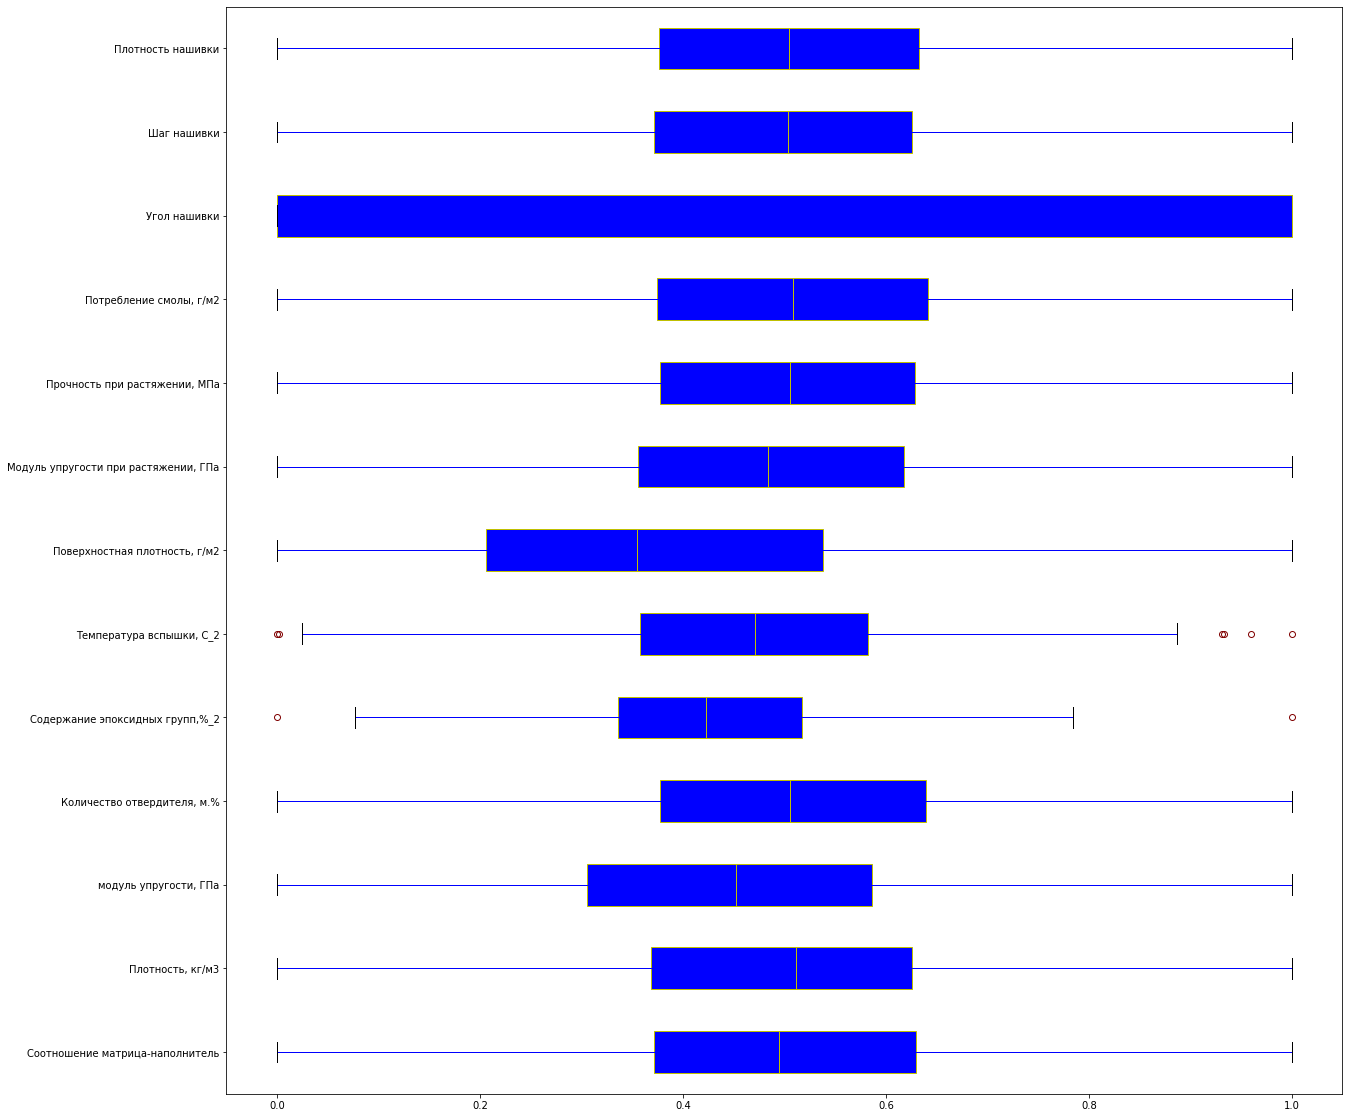

In [61]:
#ящик с усами
scaler=MinMaxScaler()
scaler.fit(df)
plt.figure(figsize=(20,20))
plt.boxplot(pd.DataFrame(scaler.transform(df)), labels=df.columns, patch_artist=True, meanline=True, vert=False, boxprops=dict(facecolor='b', color='y'), medianprops=dict(color='y'), whiskerprops=dict(color="b"), capprops=dict(color="black"), flierprops=dict(color="b", markeredgecolor="maroon"))
plt.show()

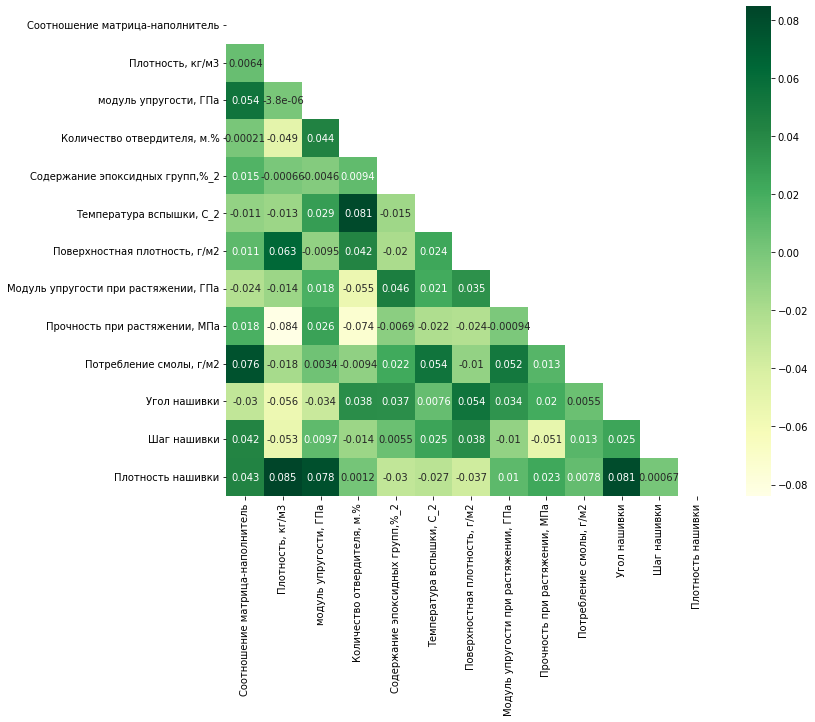

In [62]:
mask=np.triu(df.corr())
f,ax =plt.subplots(figsize=(11,9))
sns.heatmap(df.corr(), mask=mask, annot=True, square=True, cmap='YlGn')
plt.show()

**Machine Learning**



In [63]:
#объединение данных в одно пространство признаков
X_casual= np.hstack([df[num_cols].values, df[bin_cols].values])

In [64]:
#нормализация числовых признаков

scaler=StandardScaler()
num_norm=scaler.fit_transform(df[num_cols].values)
num_norm

array([[-1.18820123,  0.78184184,  0.01067899, ...,  0.03873577,
        -1.16158272,  0.21738315],
       [-1.18820123,  0.78184184,  0.01067899, ...,  0.03873577,
        -1.16158272,  1.11775721],
       [-1.18820123,  0.78184184,  0.01067899, ...,  0.03873577,
        -0.76337441, -0.95310313],
       ...,
       [ 0.39941881, -0.02823826, -0.97323156, ...,  0.32943044,
        -1.09740986,  0.90434012],
       [ 0.87314878,  1.29914613,  0.01904994, ..., -0.36166316,
        -0.24044698,  0.06081476],
       [ 0.98765772, -1.18036351, -0.9717653 , ..., -0.40317923,
        -0.33374684,  1.78713742]])

In [65]:
X_norm=np.hstack([num_norm, df[bin_cols].values])

In [66]:
X_norm

array([[-1.18820123,  0.78184184,  0.01067899, ..., -1.16158272,
         0.21738315,  0.        ],
       [-1.18820123,  0.78184184,  0.01067899, ..., -1.16158272,
         1.11775721,  0.        ],
       [-1.18820123,  0.78184184,  0.01067899, ..., -0.76337441,
        -0.95310313,  0.        ],
       ...,
       [ 0.39941881, -0.02823826, -0.97323156, ..., -1.09740986,
         0.90434012,  1.        ],
       [ 0.87314878,  1.29914613,  0.01904994, ..., -0.24044698,
         0.06081476,  1.        ],
       [ 0.98765772, -1.18036351, -0.9717653 , ..., -0.33374684,
         1.78713742,  1.        ]])

In [67]:
#формируем полиномиальные признаки 
poly = PolynomialFeatures(2)
num_poly = poly.fit_transform(df[num_cols].values)

In [68]:
#нормализуем результат
num_norm_poly=scaler.fit_transform(num_poly)

In [69]:
#объединение воедино признаков
X_norm_poly=np.hstack([num_norm_poly, df[bin_cols].values])

In [70]:
X_norm_poly

array([[ 0.        , -1.18820123,  0.78184184, ..., -0.94517616,
         0.12496688,  0.        ],
       [ 0.        , -1.18820123,  0.78184184, ..., -0.70640481,
         1.13690497,  0.        ],
       [ 0.        , -1.18820123,  0.78184184, ..., -0.97502258,
        -0.95780688,  0.        ],
       ...,
       [ 0.        ,  0.39941881, -0.02823826, ..., -0.69794318,
         0.88296625,  1.        ],
       [ 0.        ,  0.87314878,  1.29914613, ..., -0.182219  ,
        -0.03511182,  1.        ],
       [ 0.        ,  0.98765772, -1.18036351, ...,  0.43203616,
         1.990122  ,  1.        ]])

In [71]:
#Нормализуем данные с помощь Normolizer()
normalizer=Normalizer()
res=normalizer.fit_transform(df)
df_norm_n=pd.DataFrame(res, columns=df.columns)
df_norm_n

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,4.99e-04,0.55,0.20,0.01,6.38e-03,0.08,0.06,0.02,0.81,0.06,0.00e+00,1.07e-03,0.02
1,4.99e-04,0.55,0.20,0.01,8.87e-03,0.08,0.06,0.02,0.81,0.06,0.00e+00,1.07e-03,0.02
2,4.99e-04,0.55,0.20,0.03,5.71e-03,0.08,0.06,0.02,0.81,0.06,0.00e+00,1.34e-03,0.01
3,7.44e-04,0.54,0.20,0.03,5.98e-03,0.08,0.06,0.02,0.81,0.06,0.00e+00,1.34e-03,0.02
4,7.46e-04,0.54,0.20,0.03,6.00e-03,0.08,0.06,0.02,0.81,0.06,0.00e+00,1.35e-03,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,7.00e-04,0.60,0.28,0.03,6.20e-03,0.10,0.06,0.02,0.74,0.04,3.08e-04,2.80e-03,0.01
925,1.08e-03,0.64,0.14,0.05,6.14e-03,0.08,0.11,0.02,0.74,0.04,3.13e-04,3.31e-03,0.02
926,9.53e-04,0.57,0.12,0.03,6.96e-03,0.07,0.22,0.02,0.77,0.07,2.91e-04,1.21e-03,0.02
927,1.19e-03,0.66,0.24,0.05,6.19e-03,0.09,0.21,0.02,0.67,0.06,3.22e-04,2.03e-03,0.02


In [72]:
#корреляция между параметрами
df_norm_n[df_norm_n.columns].corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.00e+00,0.28,3.55e-02,0.14,0.22,1.76e-01,2.36e-02,0.26,-0.26,1.57e-01,-9.52e-03,1.38e-01,0.17
"Плотность, кг/м3",2.80e-01,1.00,-3.79e-02,0.39,0.65,5.60e-01,6.55e-02,0.87,-0.84,3.13e-01,7.82e-02,2.89e-01,0.44
"модуль упругости, ГПа",3.55e-02,-0.04,1.00e+00,0.05,-0.03,4.74e-04,-2.81e-02,-0.02,-0.39,-1.21e-02,-4.30e-02,2.14e-03,0.04
"Количество отвердителя, м.%",1.36e-01,0.39,5.18e-02,1.00,0.30,3.18e-01,6.95e-02,0.38,-0.39,1.48e-01,6.56e-02,1.23e-01,0.20
"Содержание эпоксидных групп,%_2",2.15e-01,0.65,-2.86e-02,0.30,1.00,4.00e-01,2.28e-02,0.65,-0.54,2.50e-01,9.77e-02,2.33e-01,0.28
"Температура вспышки, С_2",1.76e-01,0.56,4.74e-04,0.32,0.40,1.00e+00,4.02e-02,0.56,-0.51,2.48e-01,6.39e-02,2.06e-01,0.25
"Поверхностная плотность, г/м2",2.36e-02,0.07,-2.81e-02,0.07,0.02,4.02e-02,1.00e+00,0.05,-0.32,8.62e-03,4.46e-02,6.62e-02,-0.02
"Модуль упругости при растяжении, ГПа",2.62e-01,0.87,-2.49e-02,0.38,0.65,5.58e-01,5.36e-02,1.00,-0.74,3.30e-01,1.08e-01,3.01e-01,0.41
"Прочность при растяжении, МПа",-2.57e-01,-0.84,-3.90e-01,-0.39,-0.54,-5.06e-01,-3.16e-01,-0.74,1.00,-2.81e-01,-5.38e-02,-2.77e-01,-0.37
"Потребление смолы, г/м2",1.57e-01,0.31,-1.21e-02,0.15,0.25,2.48e-01,8.62e-03,0.33,-0.28,1.00e+00,3.63e-02,1.19e-01,0.14


**Обучение модели**

Т.к. выборки несбалансированные, применим параметр модели
class_weight='balanced', который отвечает за балансировку классов

In [73]:
X=df_norm_n

In [74]:
#разделим обучающую выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split (
        df_norm_n.loc[:,df_norm_n.columns!='Прочность при растяжении, МПА'],
        df[['Прочность при растяжении, МПа']],
        test_size=0.30,
        random_state=RANDOM_SEED,
        shuffle=True)

In [75]:
y_train

,"Прочность при растяжении, МПа"
номер по порядку,
915,2973.05
485,2185.72
306,2419.73
161,1768.49
969,3022.40
...,...
681,2181.81
614,2213.35
984,2137.27


In [76]:
y_test

,"Прочность при растяжении, МПа"
номер по порядку,
467,2535.97
148,3460.44
384,2765.55
925,1646.22
933,2391.97
...,...
272,2301.12
173,2938.12
370,3323.64


In [77]:
X_train.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
825,1.27e-03,0.51,0.12,0.04,6.95e-03,0.07,0.15,0.02,0.83,0.04,2.81e-04,1.71e-03,0.02
428,1.21e-03,0.59,0.18,0.02,7.83e-03,0.11,0.35,0.02,0.69,0.09,0.00e+00,3.18e-03,0.01
272,9.52e-04,0.60,0.20,0.03,5.97e-03,0.09,0.31,0.02,0.70,0.06,0.00e+00,2.32e-03,0.02
146,1.57e-03,0.68,0.15,0.04,8.29e-03,0.09,0.35,0.02,0.61,0.07,0.00e+00,1.91e-03,0.02
877,9.55e-04,0.50,0.21,0.02,6.94e-03,0.07,0.27,0.02,0.79,0.07,2.62e-04,1.47e-03,0.01


In [78]:
#метод опорных векторов
svr=make_pipeline(StandardScaler(), SVR(kernel='rbf', C=500.0, epsilon=1.0 ))
#обучение модели
svr.fit(X_train, np.ravel(y_train))
y_pred_svr=svr.predict(X_test)
mae_svr=mean_absolute_error(y_pred_svr, y_test)
mse_svr_elast=mean_squared_error(y_test,y_pred_svr)
print('Support Vector Regression Results Train:')
print('Test score:{:.2f}'.format(svr.score(X_train, y_train))) 
print('Support Vector Regression Results:')
print('SVR_MAE:', round(mean_absolute_percentage_error(y_test, y_pred_svr)))
print('SVR_MSE:{:.2f}'.format(mse_svr_elast))
print('SVR_RMSE:{:.2f}'.format(np.sqrt(mse_svr_elast)))
print('Test score:{:.2f}'.format(svr.score(X_test, y_test))) 

Support Vector Regression Results Train:
Test score:0.99
Support Vector Regression Results:
SVR_MAE: 0
SVR_MSE:7833.93
SVR_RMSE:88.51
Test score:0.96


In [79]:
#метод линейной регрессии
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
mae_lr=mean_absolute_error(y_pred_lr,y_test)
mse_lin_elast=mean_squared_error(y_test,y_pred_lr)
print('Linear Regression Results Train:')
print('Test score:{:.2f}'.format(lr.score(X_train, y_train)))
print('Linear Regression Results:')
print('lr_MAE:', round(mean_absolute_error(y_test, y_pred_lr)))
print('lr_MAPE:{:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_lr)))
print('lr_MSE:{:.2f}'.format(mse_lin_elast))
print('lr_RMSE:{:.2f}'.format(np.sqrt(mse_lin_elast)))
print('Test score:{:.2f}'.format(lr.score(X_test, y_test)))

Linear Regression Results Train:
Test score:0.97
Linear Regression Results:
lr_MAE: 62
lr_MAPE:0.03
lr_MSE:6239.18
lr_RMSE:78.99
Test score:0.97


In [80]:
#нейронная сеть по рекомендации соотношения матрица-наполнитель
smn=df['Соотношение матрица-наполнитель']
smn_1 = df.loc[:, df.columns!='Соотношение матрица-наполнитель']
X_train, X_test, Y_train, Y_test=train_test_split(smn_1, smn, test_size=0.3,random_state=15 )

In [81]:
#нормализация данных
X_train_norm=tf.keras.layers.Normalization(axis=-1)
X_train_norm.adapt(np.array(X_train))

2022-12-11 01:12:44.029462: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-11 01:12:44.087532: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [82]:
#построение модели
model= keras.Sequential([X_train_norm,layers.Flatten (input_shape=(28,28,1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 12)                25        
_________________________________________________________________
flatten (Flatten)            (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               1664      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 36,003
Trainable params: 35,978
Non-trainable params: 25
___________________________________________________

In [83]:
model.compile(optimizer='adam',
            loss='mean_squared_error',
          metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [85]:
model_hist=model.fit(
     X_train,
     Y_train,
     epochs=10,
     verbose=1,
     validation_split=0.2)

Epoch 1/10
17/17 [==============================] - 0s 10ms/step - loss: 9.0226 - root_mean_squared_error: 3.0038 - val_loss: 8.1004 - val_root_mean_squared_error: 2.8461
Epoch 2/10
17/17 [==============================] - 0s 7ms/step - loss: 9.0226 - root_mean_squared_error: 3.0038 - val_loss: 8.1004 - val_root_mean_squared_error: 2.8461
Epoch 3/10
17/17 [==============================] - 0s 7ms/step - loss: 9.0226 - root_mean_squared_error: 3.0038 - val_loss: 8.1004 - val_root_mean_squared_error: 2.8461
Epoch 4/10
17/17 [==============================] - 0s 6ms/step - loss: 9.0226 - root_mean_squared_error: 3.0038 - val_loss: 8.1004 - val_root_mean_squared_error: 2.8461
Epoch 5/10
17/17 [==============================] - 0s 7ms/step - loss: 9.0226 - root_mean_squared_error: 3.0038 - val_loss: 8.1004 - val_root_mean_squared_error: 2.8461
Epoch 6/10
17/17 [==============================] - 0s 7ms/step - loss: 9.0226 - root_mean_squared_error: 3.0038 - val_loss: 8.1004 - val_root_mean_s